# Pipeline Notebook 

## Imports

In [1]:
import handwriting
import keras
import tensorflow as tf
import preprocess

## Bounding Box

### Bounding Box Modell

In [2]:
from bounding_box.model import load_weight_model,predict_image,get_image_as_array, show_image 
from bounding_box.config import NUM_CLASSES_ALL,BBOX_PATH,MAIN_BBOX_DETECTOR_MODEL,SUB_BBOX_DETECTOR_MODEL  
IMAGE_PATH = "bounding_box/workspace/images/real.jpg"
bbox_model = load_weight_model(SUB_BBOX_DETECTOR_MODEL) 
boxes,confidence,classes  = predict_image(IMAGE_PATH,bbox_model)

Using TensorFlow backend
1
640
1/1 [==============================] - 4s 4s/step
[[[120.06944  66.36582 599.9427  117.06034]
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.  

## Show Image Real Image

[100.06  55.3  499.95  97.55]


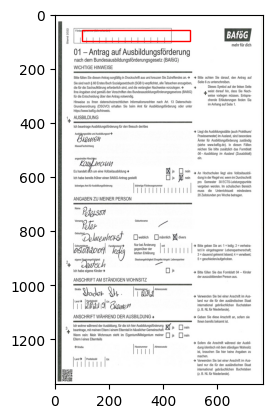

In [3]:
show_image((IMAGE_PATH), boxes,confidence,classes )  

## Overwriting Prediction because its trash 

In [4]:
boxes = [[[55.8, 426.58, 509.3, 474.6], [47.35, 470.52, 510.0, 517.97], [55.9, 520.1, 510.7, 564.6], [403.18, 568.18, 425.14, 591.56], [452.03, 568.15, 471.86, 590.82], [403.18, 591.61, 425.14, 614.99], [452.03, 592.27, 471.86, 615.64], [49.17, 619.95, 275.07, 665.28], [276.8, 618.56, 511.39, 665.31], [44.0, 701.02, 510.62, 746.92], [42.1, 746.58, 272.45, 792.5], [272.45, 747.43, 510.45, 793.35], [42.9, 790.8, 272.99, 837.5], [277.79, 810.33, 303.29, 835.84], [357.09, 810.94, 379.19, 837.29], [428.61, 811.3, 450.71, 835.96], [44.27, 838.4, 175.08, 892.79], [174.53, 839.25, 276.63, 891.05], [376.15, 835.83, 515.55, 890.24], [47.4, 893.9, 271.91, 937.82], [275.5, 893.9, 515.58, 937.1], [400.73, 932.99, 423.39, 958.57], [44.9, 998.04, 283.75, 1048.19], [288.94, 1000.31, 368.84, 1050.46], [361.19, 999.46, 512.5, 1050.46], [61.99, 1049.61, 113.8, 1094.66], [108.74, 1050.46, 187.8, 1094.66], [169.38, 1046.21, 504.9, 1091.26], [59.71, 1212.3, 288.51, 1259.76], [275.62, 1211.7, 359.33, 1257.74], [59.69, 1263.3, 115.65, 1309.35], [181.52, 1259.05, 511.03, 1309.35], [451.21, 1143.59, 472.46, 1166.97], [354.66, 1212.3, 502.01, 1256.22], [109.98, 1263.3, 190.73, 1310.76], [400.34, 1172.7, 423.71, 1195.37], [401.56, 1142.18, 424.23, 1166.97], [448.96, 1171.86, 473.04, 1196.66]]]
classes=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]]
confidence=[[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]]

### Show Image Overwriting

[55.8, 426.58, 509.3, 474.6]
[47.35, 470.52, 510.0, 517.97]
[55.9, 520.1, 510.7, 564.6]
[403.18, 568.18, 425.14, 591.56]
[452.03, 568.15, 471.86, 590.82]
[403.18, 591.61, 425.14, 614.99]
[452.03, 592.27, 471.86, 615.64]
[49.17, 619.95, 275.07, 665.28]
[276.8, 618.56, 511.39, 665.31]
[44.0, 701.02, 510.62, 746.92]
[42.1, 746.58, 272.45, 792.5]
[272.45, 747.43, 510.45, 793.35]
[42.9, 790.8, 272.99, 837.5]
[277.79, 810.33, 303.29, 835.84]
[357.09, 810.94, 379.19, 837.29]
[428.61, 811.3, 450.71, 835.96]
[44.27, 838.4, 175.08, 892.79]
[174.53, 839.25, 276.63, 891.05]
[376.15, 835.83, 515.55, 890.24]
[47.4, 893.9, 271.91, 937.82]
[275.5, 893.9, 515.58, 937.1]
[400.73, 932.99, 423.39, 958.57]
[44.9, 998.04, 283.75, 1048.19]
[288.94, 1000.31, 368.84, 1050.46]
[361.19, 999.46, 512.5, 1050.46]
[61.99, 1049.61, 113.8, 1094.66]
[108.74, 1050.46, 187.8, 1094.66]
[169.38, 1046.21, 504.9, 1091.26]
[59.71, 1212.3, 288.51, 1259.76]
[275.62, 1211.7, 359.33, 1257.74]
[59.69, 1263.3, 115.65, 1309.35]
[181

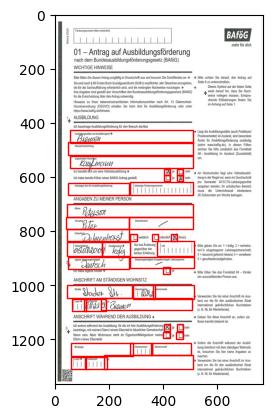

In [5]:
show_image((IMAGE_PATH), boxes,confidence,classes )   

### ROI Crop

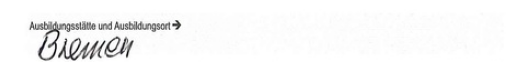

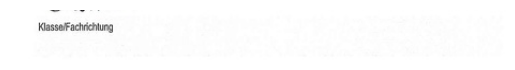

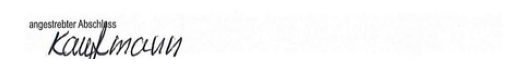

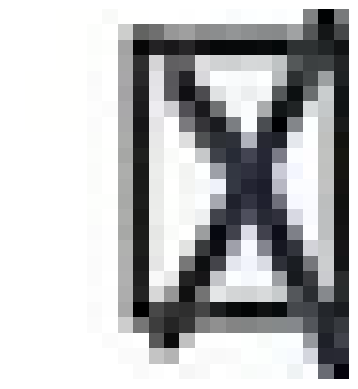

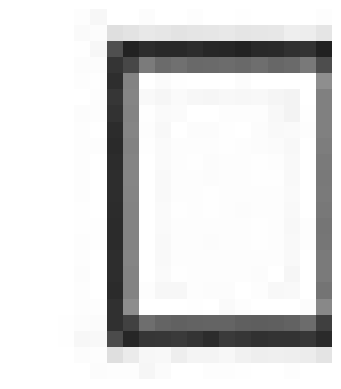

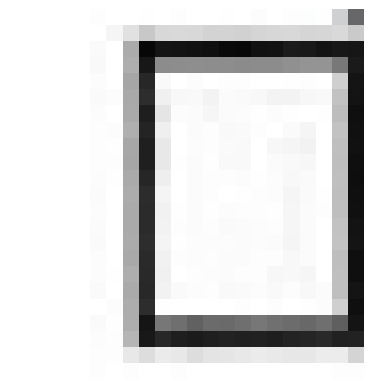

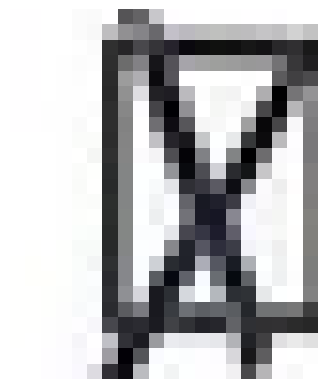

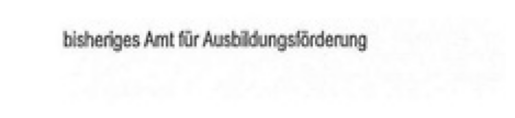

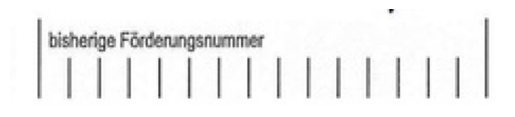

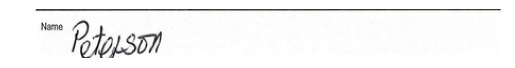

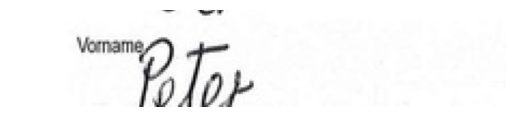

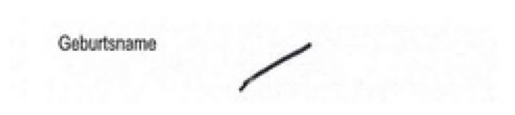

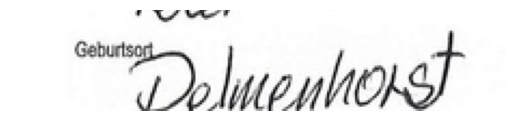

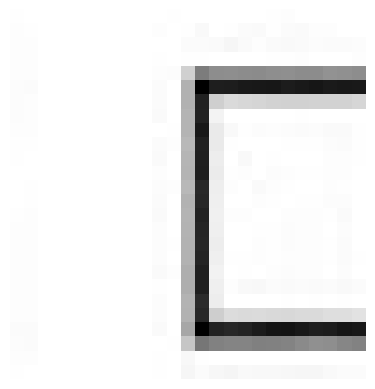

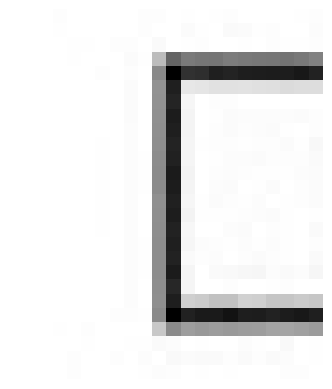

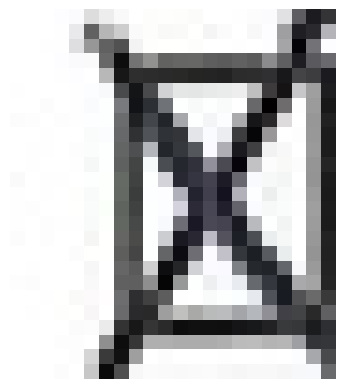

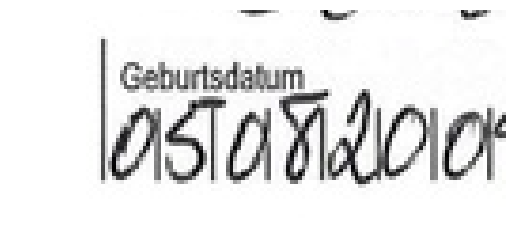

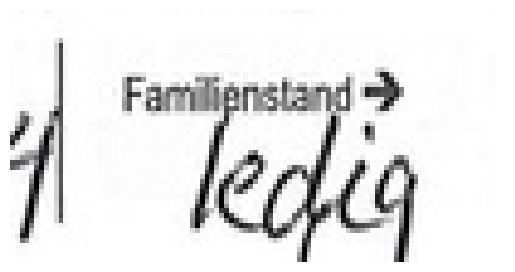

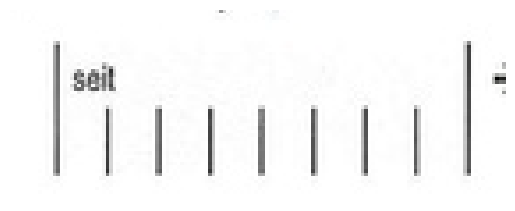

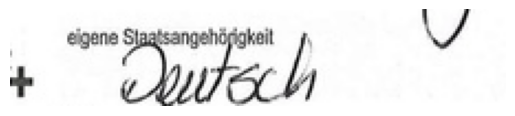

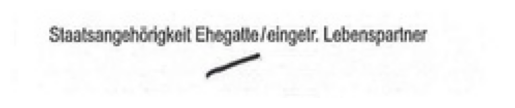

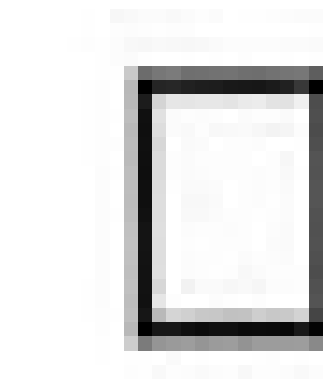

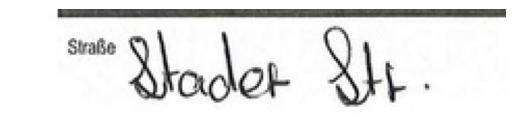

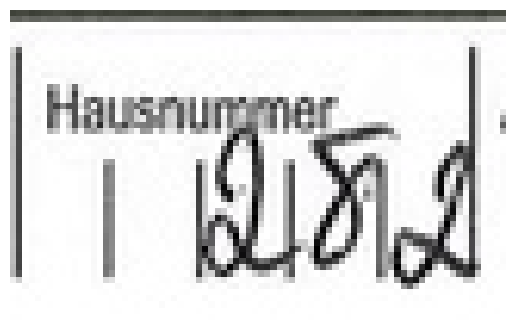

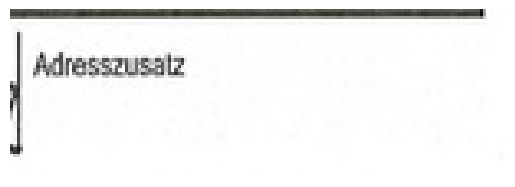

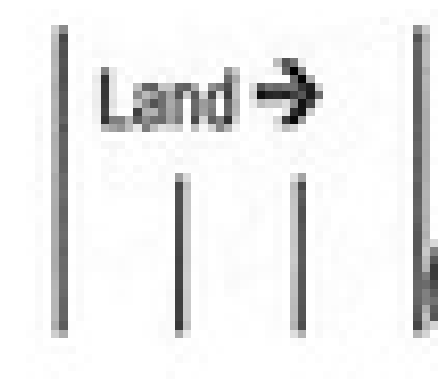

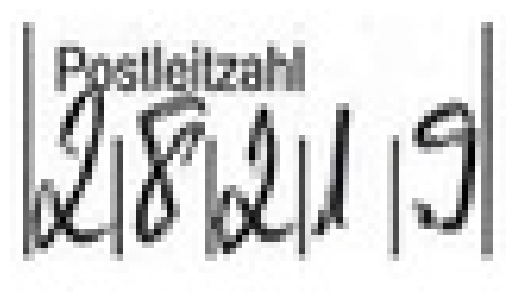

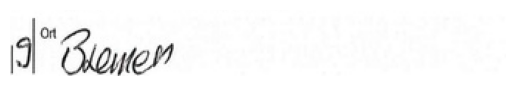

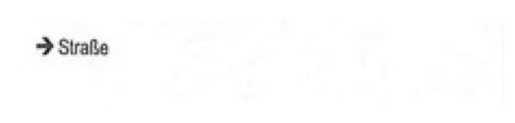

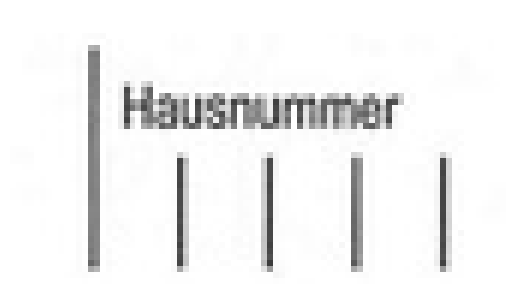

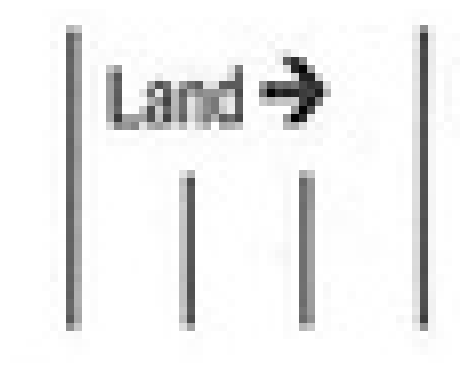

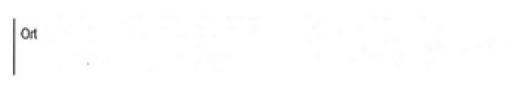

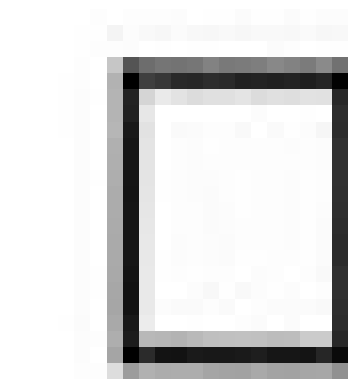

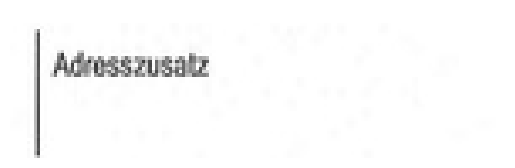

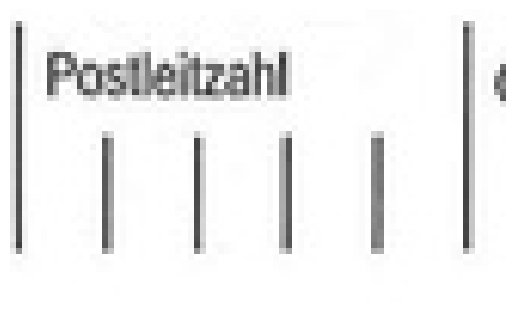

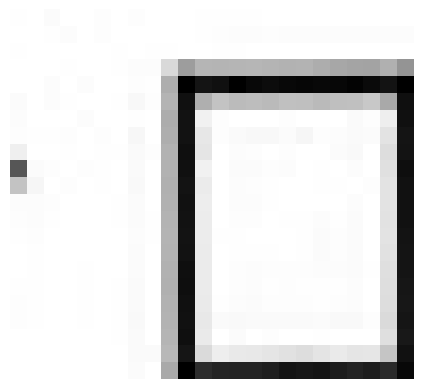

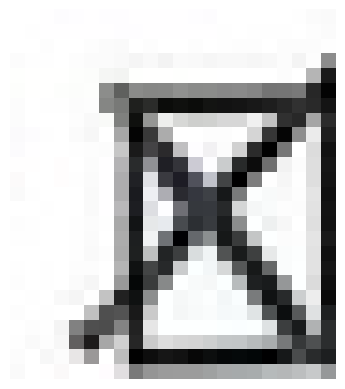

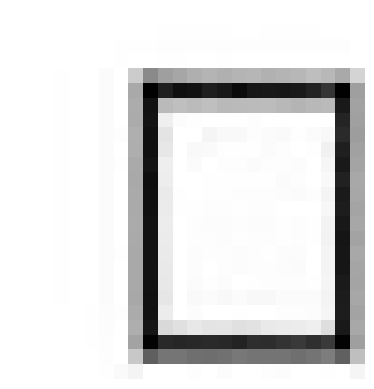

In [7]:
# Crop ROI
import cv2
def crop(xmin, ymin, xmax, ymax, image_path):
    image = cv2.imread(image_path)
    xmin = int(round(xmin))
    ymin = int(round(ymin))
    xmax = int(round(xmax))
    ymax = int(round(ymax))
    # width = int(round(width))
    # height = int(round(height))
    # rowBeg = y
    # rowEnd = y + height
    # columnBeg = x
    # columnEnd = x + width
    imgCropped = image[ymin:ymax, xmin:xmax]
    return imgCropped

import os
import matplotlib.pyplot as plt
save_directory = 'data'
os.makedirs(save_directory, exist_ok=True)
images_cropped = []
boxes = boxes[0]
for box in boxes:
    xmin, ymin, xmax, ymax = box
    imgCropped = crop(xmin, ymin, xmax, ymax, IMAGE_PATH)
    images_cropped.append(imgCropped)
    plt.axis("off")
    plt.imshow(imgCropped, cmap='gray')
    plt.show()


## Handwriting Recognition

### Preprocess Image

In [ ]:
import numpy as np
img_size=(preprocess.handwriting_img_w, preprocess.handwriting_img_h)
images = []
for image in images_cropped:
    image = np.mean(image, axis=2, keepdims=True)
    image = preprocess.distortion_free_resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0
    images.append(image)

### Plot Images

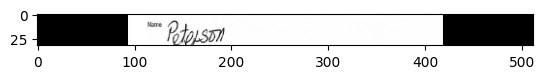

In [21]:
plot_image = images[9]
plot_image = np.transpose(plot_image, (1, 0, 2))
plot_image = np.flipud(plot_image)
plt.imshow(plot_image[:, :, 0],cmap='gray')

# Show the plot
plt.show()

### Handwriting Recognition Neural Network

In [13]:
# Neural Network Handwriting
rnn = handwriting.handwriting_model()
rnn.load_weights("handwriting_weights_alexej.keras")
prediction_model = keras.models.Model(rnn.get_layer(name="image").input, rnn.get_layer(name="dense2").output)
predicted_texts = []
# Prediction
for image in images:
    preds = prediction_model.predict(tf.expand_dims(image, axis=0))
    pred_texts = handwriting.decode_batch_predictions(preds)
    selected_pred_text = pred_texts[0]
    selected_pred_text = selected_pred_text.replace("|"," ")
    predicted_texts.append(selected_pred_text)

1/1 [==============================] - 0s 28ms/step


### Predicted Texts

In [14]:
print(predicted_texts)

['mngremmompmat  5 ', 'momoions o go o ooso ', 'monpanfmann so ', 'if', 'I', 'T', 'A', 'somounanwanswans s', 'lapprompypriii ! .', '" in peforoon d ', 'manpfo y .', 'omomp s.', 'oaiglupnhoust .', 'T', 'T', 'Iff', 'lasiaizaioi ', 'A rmpeogiy .', 'tapinit :', 'p agomtafogut .', 'waowaanapenmamane go.', 't', 'mngutader ftt . ', 'lapaod', 'ymae , .', 'lapt ', 'bpaig .', 'gfor guemen, 55   .', 'som oy o o .', 'yappoy .', 'yy i ) .', 'for .o. o po .', 't', 'frome . pe .', 'mppii !', 'f', 'I', 'I']


### Spell Checker

In [15]:
from spellchecker import SpellChecker

# spell = SpellChecker()

# Initialisierung des Spellcheckers für Deutsch
spell = SpellChecker(language='de')

# Hinzufügen von benutzerdefinierten Wörtern
# custom_words = ['Colin', 'asddf']
# spell.word_frequency.load_words(custom_words)

# Verwendung einer Datei von häufigen Wörtern oder Fachbegriffen
# with open('/data/custom_dictionary.txt') as f:
#     custom_words = f.read().splitlines()
# spell.word_frequency.load_words(custom_words)

output_text = []
for text in predicted_texts:
    words = [word for word in text.split(" ") if word != '']
    #Spellchecker
    corrected_text = ' '.join([spell.correction(word) if spell.correction(word) is not None else word for word in text.split()])
    output_text.append(corrected_text)
print(output_text)

['mngremmompmat 5', 'momoions o go o so', 'monpanfmann so', 'if', 'I', 'T', 'A', 'somounanwanswans s', 'lapprompypriii ! .', '" in peforoon d', 'manpfo y .', 'mom so', 'oaiglupnhoust .', 'T', 'T', 'if', 'lasiaizaioi', 'A rmpeogiy .', 'tapinit :', 'p agomtafogut .', 'waowaanapenmamane got', 't', 'mngutader fett .', 'lapaod', 'mal , .', 'laut', 'big .', 'for guemen, 55 .', 'so ob o o .', 'happy .', 'my i ) .', 'for so o so .', 't', 'frohe . je .', 'mppii !', 'f', 'I', 'I']


# Plot Predicted Text and Image

In [16]:
def plot_evaluation(images, texts): 
    for i in range(16):
        pred_texts = texts[i]
        title = f"Prediction: {pred_texts}"
        plot_image = images[i]
        plot_image = np.transpose(plot_image, (1, 0, 2))
        plot_image = np.flipud(plot_image)
        plt.title(title)
        plt.imshow(plot_image[:, :, 0],cmap='gray')
        plt.show()
    


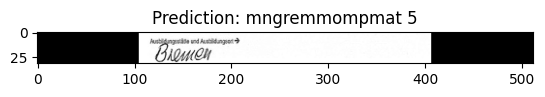

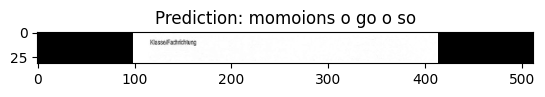

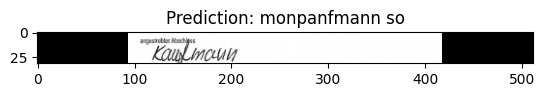

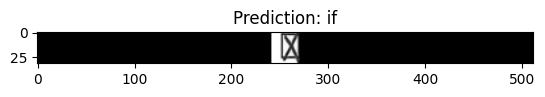

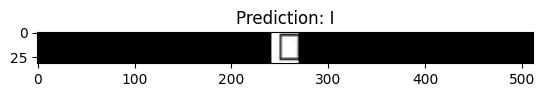

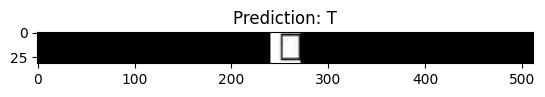

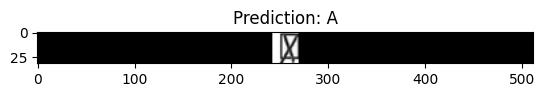

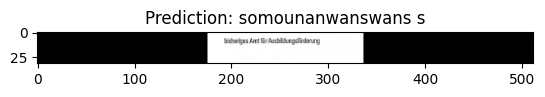

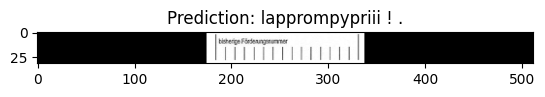

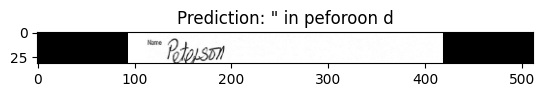

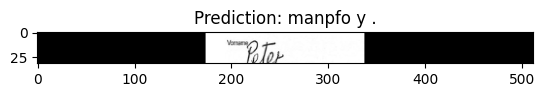

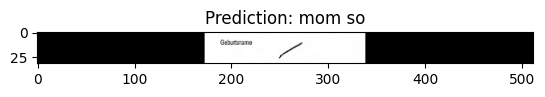

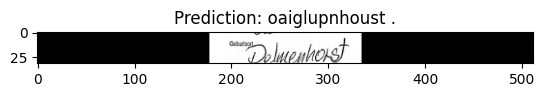

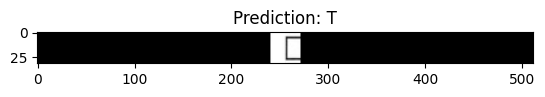

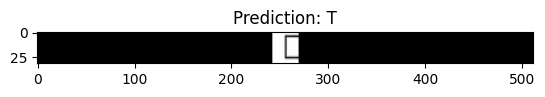

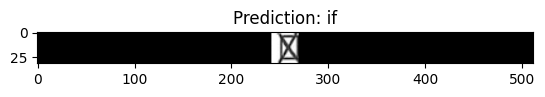

In [17]:
plot_evaluation(images, output_text)

# Prediction with normal images

1/1 [==============================] - 0s 28ms/step


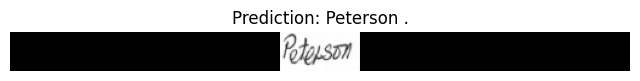

In [22]:
import preprocess

def plot_evaluation(image):
    _, ax = plt.subplots(1, 1, figsize=(8, 8))

    img = image
    img = tf.image.flip_left_right(img)
    img = tf.transpose(img, perm=[1, 0, 2])
    img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
    img = img[:, :, 0]

    preds = prediction_model.predict(tf.expand_dims(image, axis=0))
    pred_texts = handwriting.decode_batch_predictions(preds)
    
    # Display the prediction at the specified index (default is the first prediction)
    selected_pred_text = pred_texts[0]
    selected_pred_text = selected_pred_text.replace("|"," ")
    title = f"Prediction: {selected_pred_text}"
    ax.imshow(img, cmap="gray")
    ax.set_title(title)
    ax.axis("off")

    plt.show()



image_path = "data/peterson.png" 
img_size=(preprocess.handwriting_img_w, preprocess.handwriting_img_h)
image = tf.io.read_file(image_path)
image = tf.image.decode_png(image, 1)
image = preprocess.distortion_free_resize(image, img_size)
image = tf.cast(image, tf.float32) / 255.0
plot_evaluation(image)